#### Job Satisfaction

In this notebook, you will be exploring job satisfaction according to the survey results.  Use the cells at the top of the notebook to explore as necessary, and use your findings to solve the questions at the bottom of the notebook.

In [22]:
import pandas as pd
import numpy as np
import JobSatisfaction as t
import matplotlib.pyplot as plt
from tabulate import tabulate
%matplotlib inline

df = pd.read_csv('./survey_results_public.csv')
schema = pd.read_csv('./survey_results_schema.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
# Get the column names
column_names = df.columns.tolist()


# Check the columns and data types
df.info()
print("\n")
# Calculate the proportion of missing values in the JobSatisfaction column
missing_values_proportion = df['JobSatisfaction'].isnull().mean()

print(f"proportion of missing values in JobSatisfaction: {missing_values_proportion}")



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19102 entries, 0 to 19101
Columns: 154 entries, Respondent to ExpectedSalary
dtypes: float64(6), int64(1), object(147)
memory usage: 22.4+ MB


proportion of missing values in JobSatisfaction: 0.20149722542142184


In [7]:
# Display the first 5 rows of the JobSatisfaction column
print(df['JobSatisfaction'].head())
print("\n")

# Get summary statistics for the JobSatisfaction column
print(df['JobSatisfaction'].describe())


2    9.0
3    3.0
4    8.0
6    6.0
7    7.0
Name: JobSatisfaction, dtype: float64


count    15253.000000
mean         7.000721
std          2.128648
min          0.000000
25%          6.000000
50%          7.000000
75%          8.000000
max         10.000000
Name: JobSatisfaction, dtype: float64


Average Job Satisfaction by Employment Status:
EmploymentStatus
Employed full-time                                      6.980608
Employed part-time                                      6.846154
Independent contractor, freelancer, or self-employed    7.231985
Name: JobSatisfaction, dtype: float64
Average Job Satisfaction by Company Size:
CompanySize
1,000 to 4,999 employees    6.908506
10 to 19 employees          7.035739
10,000 or more employees    6.793617
100 to 499 employees        7.029324
20 to 99 employees          6.997039
5,000 to 9,999 employees    6.832155
500 to 999 employees        7.029967
Fewer than 10 employees     7.025719
I don't know                7.054622
I prefer not to answer      7.284946
Name: JobSatisfaction, dtype: float64


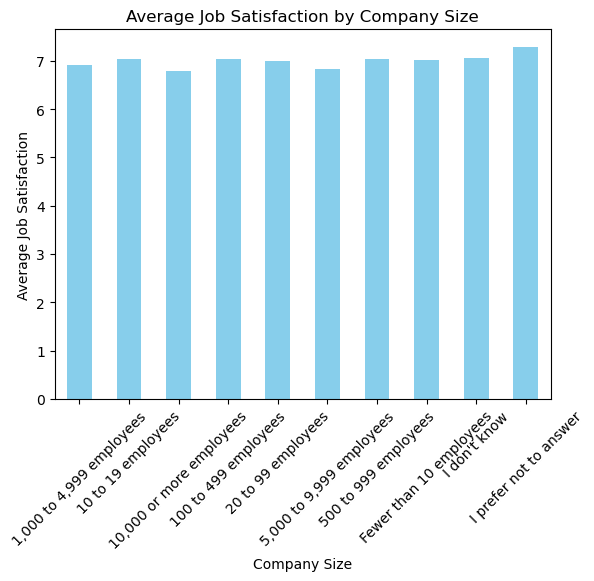

In [16]:
# Group by EmploymentStatus and calculate the average JobSatisfaction
average_job_satisfaction = df.groupby('EmploymentStatus')['JobSatisfaction'].mean()

# Print the results
print("Average Job Satisfaction by Employment Status:")
print(average_job_satisfaction)

# Group by Company Size and calculate the average Job Satisfaction
average_job_sat_per_com = df.groupby('CompanySize')['JobSatisfaction'].mean()

# Print the results for Company Size
print("Average Job Satisfaction by Company Size:")
print(average_job_sat_per_com)

# Optional: Visualize the results for Company Size
average_job_sat_per_com.plot(kind='bar', color='skyblue')
plt.title('Average Job Satisfaction by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Average Job Satisfaction')
plt.xticks(rotation=45)
plt.show()

In [28]:
# Calculate the sum of each choice in the ImportantHiringEducation column
education_counts = df['ImportantHiringEducation'].value_counts()

# Print the results
print("Sum of each choice in ImportantHiringEducation:")
print(education_counts)
print("\n")

# Filter relevant columns
# Assuming 'ProgramHobby' indicates if they program outside of work (Yes/No)
# and 'JobSatisfaction' is the column for job satisfaction scores
data = df[['ProgramHobby', 'JobSatisfaction']].dropna()

# Group by 'ProgramHobby' and calculate the mean job satisfaction
grouped_data = data.groupby('ProgramHobby')['JobSatisfaction'].mean().reset_index()

# Print the average job satisfaction for each group
print(grouped_data)
print("\n")
# Filter relevant columns
# Assuming 'HomeRemote' indicates if they have the flexibility to work remotely (Yes/No)
# and 'JobSatisfaction' is the column for job satisfaction scores
data = df[['HomeRemote', 'JobSatisfaction']].dropna()

# Group by 'HomeRemote' and calculate the mean job satisfaction
grouped_data = data.groupby('HomeRemote')['JobSatisfaction'].mean().reset_index()

# Print the average job satisfaction for each group
print(grouped_data)
print("\n")

# Filter relevant columns
# Assuming 'EducationLevel' indicates the level of education and 'JobSatisfaction' is the column for job satisfaction scores
data = df[['FormalEducation', 'JobSatisfaction']].dropna()

# Group by 'EducationLevel' and calculate the mean job satisfaction
grouped_data = data.groupby('FormalEducation')['JobSatisfaction'].mean().reset_index()

# Print the average job satisfaction for each education level
print(grouped_data)

Sum of each choice in ImportantHiringEducation:
ImportantHiringEducation
Somewhat important      4204
Not very important      3252
Important               2005
Not at all important    1081
Very important           341
Name: count, dtype: int64


                                ProgramHobby  JobSatisfaction
0                                         No         6.874806
1  Yes, I contribute to open source projects         7.158649
2                  Yes, I program as a hobby         6.927150
3                                  Yes, both         7.189316


                                          HomeRemote  JobSatisfaction
0                              A few days each month         7.096694
1                                About half the time         7.125737
2  All or almost all the time (I'm full-time remote)         7.405421
3                                   It's complicated         6.942053
4  Less than half the time, but at least one day ...         7.143786
5              More th

#### Question 1

**1.** Use the space above to assist in matching each variable (**a**, **b**, **c**, **d**, **e**, **f**, **g**, or **h** ) as the appropriate key that describes the value in the **job_sol_1** dictionary.

In [18]:
a = 0.734
b = 0.2014
c = 'full-time'
d = 'contractors'
e = 'retired'
f = 'yes'
g = 'no'
h = 'hard to tell'

job_sol_1 = {'The proportion of missing values in the Job Satisfaction column': b,
             'According to EmploymentStatus, which group has the highest average job satisfaction?': d, 
             'In general, do smaller companies appear to have employees with higher job satisfaction?': f}
             
t.jobsat_check1(job_sol_1)

Nice job! That's what we found as well!


#### Question 2

**2.** Use the space above to assist in matching each variable (**a**, **b**, **c** ) as the appropriate key that describes the value in the **job_sol_2** dictionary. Notice you can have the same letter appear more than once.

In [30]:
a = 'yes'
b = 'no'
c = 'hard to tell'

job_sol_2 = {'Do individuals who program outside of work appear to have higher JobSatisfaction?': a,
             'Does flexibility to work outside of the office appear to have an influence on JobSatisfaction?': a, 
             'A friend says a Doctoral degree increases the chance of having job you like, does this seem true?': a}
             
t.jobsat_check2(job_sol_2)

Nice job! That's what we found as well!
